In [1]:
labels = [
('Chinh tri Xa hoi', 0),
('Cong Nghe', 1),
('Doi Song', 2),
('Du Lich', 3),
('Giai Tri', 4),
('Giao Duc', 5),
('Khoa hoc', 6),
('Kinh doanh', 7),
('Phap Luat ', 8),
('Suc Khoe', 9),
('The Gioi', 10),
('The Thao', 11),
('Xe', 12),
]

import pandas as pd
import codecs
from sklearn.model_selection import train_test_split  

data = pd.read_csv(
    codecs.open('train_data/data_dantri.csv', 'r', 'utf-8'))
data = data.append(pd.read_csv(
    codecs.open('train_data/vnexpress.csv', 'r', 'utf-8')),ignore_index=True)

data = data.loc[data.sample(frac=1).groupby('label').cumcount() <= 2000]
         
X, y = data.content, data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for label, idx in labels:
    print('%d. %s: %d' % (idx, label,len(data[data.label == idx])))
print('----')
for label, idx in labels:
    print('%d. %s: %d' % (idx, label,len(y_train[y_train == idx])))


0. Chinh tri Xa hoi: 2001
1. Cong Nghe: 2001
2. Doi Song: 2001
3. Du Lich: 2001
4. Giai Tri: 2001
5. Giao Duc: 2001
6. Khoa hoc: 1954
7. Kinh doanh: 2001
8. Phap Luat : 2001
9. Suc Khoe: 2001
10. The Gioi: 2001
11. The Thao: 2001
12. Xe: 1206
----
0. Chinh tri Xa hoi: 1621
1. Cong Nghe: 1592
2. Doi Song: 1588
3. Du Lich: 1569
4. Giai Tri: 1613
5. Giao Duc: 1593
6. Khoa hoc: 1569
7. Kinh doanh: 1616
8. Phap Luat : 1603
9. Suc Khoe: 1605
10. The Gioi: 1588
11. The Thao: 1609
12. Xe: 970


In [2]:
from sklearn.feature_extraction.text import CountVectorizer



1746     những điều vĩ_đại có_thể xuất_phát từ những ướ...
58818    nữ phó giám_đốc lĩnh án vì cấp dưới thiệt_mạng...
5999     trải qua một năm với nhiều sự_kiện sóng_gió củ...
53606    bộ công_thương đề_xuất cho evn vay lại vốn oda...
33270     cần có quy_định hồi_tố đưa ra tòa những người...
33608    vườn đào nhật_tân đang ngả dần sang sắc màu ho...
50110    hội_thảo chủ_đề du_học anh kaplan và apollo tổ...
57622    lão_nông lãnh án chung_thân vì giết người tron...
11118    ngày tổ_chức minh_bạch quốc_tế ti đã công_bố c...
6520     trưa cơ_quan an_ninh điều_tra công_an tp cần_t...
30165    man_city tiếp_tục hành_trình giành vé dự champ...
20953    các đồng_minh của mỹ trong khối nato đang nóng...
51198    tìm ra tuổi của truyện_cổ_tích phương tây theo...
40038    ngôi nhà trắng không tỳ vết ở nhật toàn_bộ tườ...
55098    ernst young ngân_hàng ít tiền vẫn có_thể số hó...
32996    theo sở gtvt_tphcm hiện_nay thành_phố có hơn t...
28351    nữ vận_động_viên quách_thị_lan đã giành tấm hu.

In [3]:
import time

start = time.time()
from model.svm_model import SVMModel
model = SVMModel('rbf')
clf = model.clf.fit(X_train,y_train)

print(time.time() - start)

import pickle
pkl_filename = "svm_rbf_model.pkl"  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(clf, file)

1283.7577378749847


In [11]:
import pickle
pkl_filename = "nb_model.pkl"
with open(pkl_filename, 'rb') as file:  
    clf = pickle.load(file)


In [12]:
data = pd.read_csv(codecs.open('train_data/vietnamnet.csv', 'r', 'utf-8'))         
X_test, y_test = data.content, data.label

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  2  72   1   1   0   2   7   7   4   0   6   0   0]
 [ 17   0  94  12  18   4   0   0   7   4   3   1   0]
 [  0   0   1  17   0   0   0   1   0   0   0   0   0]
 [  3   0   7   5 153   5   0   0   2   1   1   1   0]
 [  2   1  27   0   9 409   6   3   8   6   3   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 27   5  21  20   1   1   3 311  33   5   7   0  40]
 [  1   0   0   0   1   4   0   1 119   0   0   0   0]
 [  0   0   1   0   0   1   1   0   0  56   0   2   0]
 [  8   0  11   8   3   2   1   4   6   3 144   0   1]
 [  0   0   1   1   0   0   0   3   0   0   0 278   1]
 [ 26   0  11   3   0   1   2  19   7   0   3   1 411]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.92      0.71      0.80       102
         2.0       0.54      0.59      0.56       160
         3.0       0.25      0.89      0.40        19
         4.0 

/home/ngochoang/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [55]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
f = open('vietnamese-stopwords-dash.txt', 'r')
sw = f.read().splitlines()
f.close()

cnt =CountVectorizer(min_df=5, max_df=0.7, stop_words=sw)
Y= cnt.fit(X_test).vocabulary_
tfidf = TfidfTransformer()
X= tfidf.fit_transform(cnt.fit_transform(X_test))
print(type(Y))

<class 'dict'>


In [56]:
print(len(cnt.fit(X_test).vocabulary_))
for i in range(len(X[1].indices)):
    print(list(Y.keys())[list(Y.values()).index(X[1].indices[i])])
    print(X[1].data[i])
print(X[1].data)

9716
ảnh
0.027417031196053557
đời_mới
0.09212226404787718
đọc
0.19411148259744174
định
0.058964562221564
đặt_hàng
0.06443270531396875
đơn
0.04814710055194825
đóng_góp
0.05108001847490825
đánh_bại
0.058964562221564
điện_thoại_di_động
0.07457377464723589
điều_hành
0.09864885565747489
đi
0.020296422018773002
ý_tưởng
0.054743382579785095
ý_kiến
0.04260411777512213
áp_lực
0.04538393819062188
áp_dụng
0.04047924901143244
xs
0.16614023187062096
xr
0.08545114233561897
usd
0.06740018800254059
tỷ
0.06042555677199286
tự_tin
0.05310881586721655
tỉnh
0.0732781727093034
tệ_hại
0.08682709685105187
tập_luyện
0.19572229944011446
tò_mò
0.06367174313812946
tìm_kiếm
0.05089345117064614
táo
0.07576181960143531
trở_nên
0.04367810533016853
tràn_đầy
0.07706885844669739
tiến_hành
0.04346661100443855
thức
0.07247978154165988
thế_giới
0.029437835613483853
thú_vị
0.05257131246434905
thói_quen
0.05378445734784215
thành_công
0.07455252195253731
sở_thích
0.06249441586134026
sản_phẩm
0.04170310611565517
samsung
0.1449

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




Confusion matrix, without normalization
[[259   1  11  13   0   8   3  15  42   5  14   5   0]
 [  2 347   3   1   4   7   0  18   2   1   8   4   0]
 [ 11   6 291  26   9  12   1  30   2  26   2   2   0]
 [  3   0  22 371   7   3   7   2   4   2   9   3   0]
 [  5   0  23  13 329   1   0   0   0   2   3   8   0]
 [  5   1  16   0   5 377   1   0   6   2   2   1   1]
 [  3   7   8   8   2  17 270   9   0  40  12   0   1]
 [ 18  15  33  15   0   3   7 265   9   3   4   1   6]
 [ 14   0   1   0   0   1   0   4 370   2   2   0   1]
 [  7   2   9   1   4   3   5   3   5 363   0   1   0]
 [  7   0  12   9   7   4   5   4  12   2 344   3   1]
 [  1   0   2   2   0   0   0   0   0   1   1 394   0]
 [  8   1   8   1   1   3   0   6   0   2   2   3 210]]


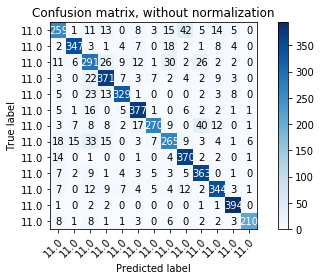

In [14]:
np.set_printoptions(precision=5)
class_names = data_dantri.label

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()